In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

In [51]:
chips = pd.read_csv('chips.csv')
geyser = pd.read_csv('geyser.csv')

In [6]:
chips.head()

,x,y,class
0,0.051267,0.69956,P
1,-0.092742,0.68494,P
2,-0.213710,0.69225,P
3,-0.375000,0.50219,P
4,-0.513250,0.46564,P


In [7]:
geyser.head()

,x,y,class
0,1,4.4,N
1,1,3.9,N
2,1,4.0,P
3,1,4.0,N
4,1,3.5,N


In [52]:
for x in [chips, geyser]:
    x.replace({'P' : 1, 'N' : -1}, inplace = True)

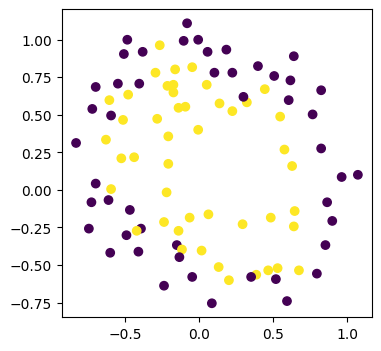

In [64]:
# График для набора даннных chips
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(X_train_c.x, X_train_c.y, c = y_train_c)

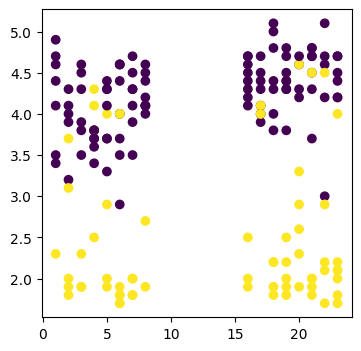

In [65]:
# График для набора даннных geyser
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(X_train_g.x, X_train_g.y, c = y_train_g)

In [61]:
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(geyser.drop('class', axis = 1), 
                                                    geyser['class'], 
                                                    test_size = 0.2, 
                                                    random_state = 42, 
                                                    stratify = geyser['class'])

In [62]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(chips.drop('class', axis = 1), 
                                                    chips['class'], 
                                                    test_size = 0.2, 
                                                    random_state = 42, 
                                                    stratify = chips['class'])

In [66]:
C = [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]
degree = [2, 3, 4, 5]
gamma = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

linear_params = {'kernel' : ['linear'], 'C' : C}
poly_params = {'kernel' : ['poly'], 'C' : C, 'degree' : degree}
rbf_params = {'kernel' : ['rbf'], 'C' : C, 'gamma' : gamma}

In [115]:
# make models with different kernels and params
linear_grid_search = GridSearchCV(SVC(), linear_params, scoring = 'accuracy', 
                                         verbose = 2, refit = True, n_jobs = -1)
poly_grid_search = GridSearchCV(SVC(), poly_params, scoring = 'accuracy', 
                                         verbose = 2, refit = True, n_jobs = -1)
rbf_grid_search = GridSearchCV(SVC(), rbf_params, scoring = 'accuracy', 
                                         verbose = 2, refit = True, n_jobs = -1)

In [117]:
# models dict
models = {'linear':linear_grid_search_geyser,'poly':poly_grid_search_geyser,'rbf': rbf_grid_search_geyser}

In [118]:
models

{'linear': GridSearchCV(estimator=SVC(), n_jobs=-1,
              param_grid={'C': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0],
                          'kernel': ['linear']},
              scoring='accuracy', verbose=2),
 'poly': GridSearchCV(estimator=SVC(), n_jobs=-1,
              param_grid={'C': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0],
                          'degree': [2, 3, 4, 5], 'kernel': ['poly']},
              scoring='accuracy', verbose=2),
 'rbf': GridSearchCV(estimator=SVC(), n_jobs=-1,
              param_grid={'C': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0],
                          'gamma': [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5],
                          'kernel': ['rbf']},
              scoring='accuracy', verbose=2)}

In [124]:
# fit models for geyser dataset
geyser_results = {}
for mv, mk in zip(models.values(), models.keys()):
    mv.fit(X_train_g, y_train_g)
    geyser_results[mk] = [mv.best_estimator_, mv.best_score_]

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .......................C=1.0, gamma=4.5, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.0, gamma=5, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=1.5, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=1.5, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=1.5, kernel=rbf; total time=   0.0s
[CV] END ........................C=10.0, gamma=2, kernel=rbf; total time=   0.0s
[CV] END ........................C=10.0, gamma=2, kernel=rbf; total time=   0.0s
[CV] END ........................C=10.0, gamma=2, kernel=rbf; total time=   0.0s
[CV] END ........................C=10.0, gamma=2, kernel=rbf; total time=   0.0s
[CV] END ........................C=10.0, gamma=2, kernel=rbf; total time=   0.0s
[CV] END ........................C=10.0, gamma=4, kernel=rbf; total time=   0.0s
[CV] END ........................C=10.0, gamma=5,

[CV] END .......................C=5.0, gamma=3.5, kernel=rbf; total time=   0.0s
[CV] END .......................C=5.0, gamma=3.5, kernel=rbf; total time=   0.0s
[CV] END .......................C=5.0, gamma=3.5, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=2.5, kernel=rbf; total time=   0.0s
[CV] END ........................C=10.0, gamma=3, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=3.5, kernel=rbf; total time=   0.0s
[CV] END ........................C=10.0, gamma=4, kernel=rbf; total time=   0.0s
[CV] END ........................C=10.0, gamma=5, kernel=rbf; total time=   0.0s
[CV] END ......................C=50.0, gamma=1.5, kernel=rbf; total time=   0.0s
[CV] END ........................C=50.0, gamma=2, kernel=rbf; total time=   0.0s
[CV] END ........................C=50.0, gamma=3, kernel=rbf; total time=   0.0s
[CV] END ........................C=50.0, gamma=4, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .......................C=5.0, degree=2, kernel=poly; total time=   0.0s
[CV] END ......................C=10.0, degree=4, kernel=poly; total time=   0.0s
[CV] END ......................C=10.0, degree=4, kernel=poly; total time=   0.0s
[CV] END ........................C=10.0, gamma=4, kernel=rbf; total time=   0.0s
[CV] END ........................C=10.0, gamma=5, kernel=rbf; total time=   0.0s
[CV] END ........................C=50.0, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=50.0, gamma=2, kernel=rbf; total time=   0.0s
[CV] END ......................C=50.0, gamma=2.5, kernel=rbf; total time=   0.0s
[CV] END ......................C=50.0, gamma=3.5, kernel=rbf; total time=   0.0s
[CV] END ......................C=50.0, gamma=4.5, kernel=rbf; total time=   0.0s
[CV] END ........................C=50.0, gamma=5, kernel=rbf; total time=   0.0s
[CV] END .....................C=100.0, gamma=1.5, kernel=rbf; total time=   0.0s
[CV] END ...................

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ..............................C=50.0, kernel=linear; total time=   0.0s
[CV] END ......................C=0.05, degree=2, kernel=poly; total time=   0.0s
[CV] END ......................C=0.05, degree=3, kernel=poly; total time=   0.0s
[CV] END ......................C=0.05, degree=5, kernel=poly; total time=   0.0s
[CV] END ......................C=0.05, degree=5, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=4, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=4, kernel=poly; total time=   0.0s
[CV] END .......................C=0.5, degree=3, kernel=poly; total time=   0.0s
[CV] END .......................C=0.5, degree=3, kernel=poly; total time=   0.0s
[CV] END .......................C=0.5, degree=4, kernel=poly; total time=   0.0s
[CV] END .......................C=0.5, degree=4, kernel=poly; total time=   0.0s
[CV] END .......................C=5.0, degree=2

[CV] END .....................C=100.0, gamma=2.5, kernel=rbf; total time=   0.0s
[CV] END .......................C=100.0, gamma=3, kernel=rbf; total time=   0.0s
[CV] END .....................C=100.0, gamma=3.5, kernel=rbf; total time=   0.0s
[CV] END .....................C=100.0, gamma=4.5, kernel=rbf; total time=   0.0s
[CV] END .......................C=100.0, gamma=5, kernel=rbf; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=5.0, kernel=linear; total time=   0.0s
[CV] END ...............................C=5.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=50.0, kernel=linear; total time=   0.0s
[CV] END ......................C=0.05, degree=2, kernel=poly; total time=   0.0s
[CV] END ......................C=0.05, degree=3, kernel=poly; total time=   0.0s
[CV] END ......................C=0.05, degree=5, kernel=poly; total time=   0.0s
[CV] END ...................

In [120]:
geyser_results

{'linear': [SVC(C=0.5, kernel='linear'), 0.8925396825396824],
 'poly': [SVC(C=50.0, degree=2, kernel='poly'), 0.8982539682539681],
 'rbf': [SVC(C=0.5, gamma=1), 0.8755555555555556]}

In [123]:
# fit models for chips dataset
chips_results = {}
for mv, mk in zip(models.values(), models.keys()):
    mv.fit(X_train_c, y_train_c)
    chips_results[mk] = [mv.best_estimator_, mv.best_score_]

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .......................C=0.1, gamma=3.5, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=3.5, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=3.5, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=4, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.5, gamma=2, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=2.5, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=2.5, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.5, gamma=2.5, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.0, gamma=4, kernel=rbf; total time=   0.0s
[CV] END .........................C=1.0, gamma=4, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.0, gamma=4.5, kernel=rbf; total time=   0.0s
[CV] END .......................C=1.0, gamma=4.5,

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END .......................C=0.5, gamma=4.5, kernel=rbf; total time=   0.0s
[CV] END .........................C=5.0, gamma=2, kernel=rbf; total time=   0.0s
[CV] END .........................C=5.0, gamma=2, kernel=rbf; total time=   0.0s
[CV] END .........................C=5.0, gamma=2, kernel=rbf; total time=   0.0s
[CV] END .......................C=5.0, gamma=2.5, kernel=rbf; total time=   0.0s
[CV] END .......................C=5.0, gamma=2.5, kernel=rbf; total time=   0.0s
[CV] END .......................C=5.0, gamma=2.5, kernel=rbf; total time=   0.0s
[CV] END .......................C=5.0, gamma=2.5, kernel=rbf; total time=   0.0s
[CV] END .......................C=5.0, gamma=2.5, kernel=rbf; total time=   0.0s
[CV] END ........................C=10.0, gamma=3, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=3.5, kernel=rbf; total time=   0.0s
[CV] END ......................C=10.0, gamma=4.

In [125]:
chips_results

{'linear': [SVC(C=0.05, kernel='linear'), 0.5105263157894736],
 'poly': [SVC(C=0.5, degree=2, kernel='poly'), 0.7760233918128654],
 'rbf': [SVC(C=5.0, gamma=2), 0.8415204678362572]}

In [129]:
# make models with the best params for geyser dataset
geyser_best_linear_m = geyser_results['linear'][0]
geyser_best_poly_m = geyser_results['poly'][0]
geyser_best_rbf_m = geyser_results['rbf'][0]

In [134]:
g_lin = geyser_best_linear_m.fit(X_train_g, y_train_g)
g_pol = geyser_best_poly_m.fit(X_train_g, y_train_g)
g_rbf = geyser_best_rbf_m.fit(X_train_g, y_train_g)

In [130]:
# make models with the best params for chips dtaset
chips_best_linear_m = chips_results['linear'][0]
chips_best_poly_m = chips_results['poly'][0]
chips_best_rbf_m = chips_results['rbf'][0]

[CV] END .....................C=100.0, gamma=4.5, kernel=rbf; total time=   0.0s
[CV] END ..............................C=0.05, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.5, kernel=linear; total time=   0.0s
[CV] END ...............................C=5.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END .............................C=100.0, kernel=linear; total time=   0.1s
[CV] END ......................C=0.05, degree=2, kernel=poly; total time=   0.0s
[CV] END ......................C=0.05, degree=4, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=3, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=3, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=5, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=5, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ......................C=50.0, degree=3, kernel=poly; total time=   0.0s
[CV] END ......................C=50.0, degree=3, kernel=poly; total time=   0.0s
[CV] END ......................C=50.0, degree=4, kernel=poly; total time=   0.1s
[CV] END ......................C=50.0, degree=5, kernel=poly; total time=   0.5s
[CV] END .....................C=100.0, degree=5, kernel=poly; total time=   0.4s
[CV] END ......................C=0.05, gamma=1.5, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.05, gamma=2, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.05, gamma=3.5, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.05, gamma=3.5, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.5, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.5, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=1.5, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ......................C=10.0, degree=5, kernel=poly; total time=   0.1s
[CV] END ......................C=50.0, degree=4, kernel=poly; total time=   0.1s
[CV] END .....................C=100.0, degree=2, kernel=poly; total time=   0.0s
[CV] END .....................C=100.0, degree=2, kernel=poly; total time=   0.0s
[CV] END .....................C=100.0, degree=3, kernel=poly; total time=   0.1s
[CV] END .....................C=100.0, degree=3, kernel=poly; total time=   0.0s
[CV] END .....................C=100.0, degree=4, kernel=poly; total time=   0.2s
[CV] END .....................C=100.0, degree=5, kernel=poly; total time=   0.7s
[CV] END ......................C=0.05, gamma=1.5, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.05, gamma=2.5, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.05, gamma=4, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.05, gamma=4.5, kernel=rbf; total time=   0.0s
[CV] END ...................

In [135]:
ch_lin = chips_best_linear_m.fit(X_train_c, y_train_c)
ch_pol = chips_best_poly_m.fit(X_train_c, y_train_c)
ch_rbf = chips_best_rbf_m.fit(X_train_c, y_train_c)

In [141]:
g_lin.coef_[0]   

array([ 0.03905023, -1.24951687])

In [142]:
 g_lin.intercept_[0] 

3.467258900638757

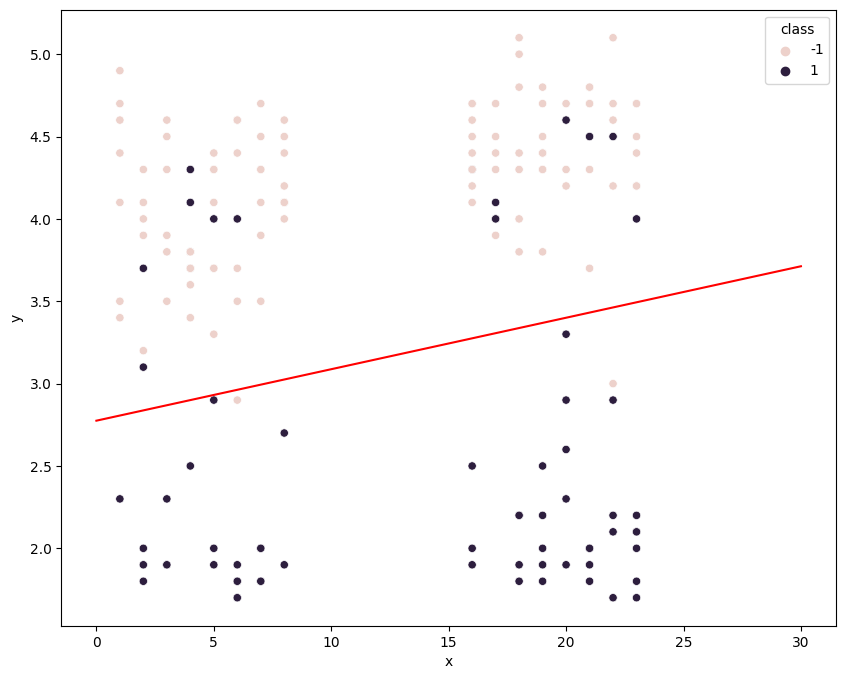

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))# Plotting our two-features-space
sns.scatterplot(x=X_train_g.x, 
                y=X_train_g.y, 
                hue=y_train_g)
# Constructing a hyperplane using a formula.
w = g_lin.coef_[0]           
# w consists of 2 elements
b = g_lin.intercept_[0]      
# b consists of 1 element
x_points = np.linspace(0, 30)   
# generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  

# getting corresponding y-points # Plotting a red hyperplane
plt.plot(x_points, y_points, c='r')

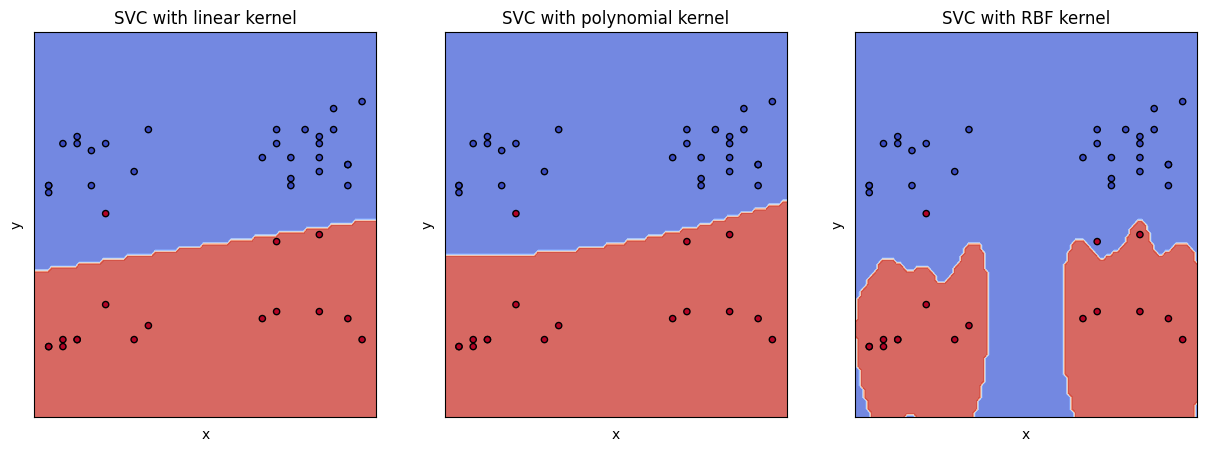

In [158]:
models = (g_lin, g_pol,g_rbf)

# title for the plots
titles = (
    "SVC with linear kernel",
    "SVC with polynomial kernel",
    "SVC with RBF kernel",
)


fig, sub = plt.subplots(1, 3, figsize=(15, 5))


for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test_g,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel='x',
        ylabel='y',
    )
    ax.scatter(X_test_g.x, X_test_g.y, c=y_test_g, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

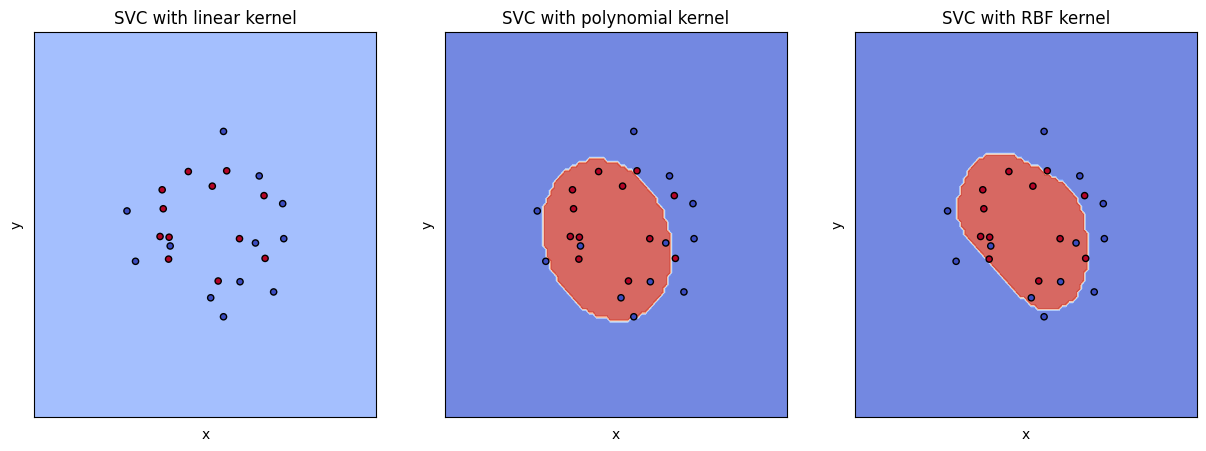

In [160]:
models = (ch_lin, ch_pol,ch_rbf)

# title for the plots
titles = (
    "SVC with linear kernel",
    "SVC with polynomial kernel",
    "SVC with RBF kernel",
)


fig, sub = plt.subplots(1, 3, figsize=(15, 5))


for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test_c,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel='x',
        ylabel='y',
    )
    ax.scatter(X_test_c.x, X_test_c.y, c=y_test_c, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()